### 1
Напишите код, моделирующий выпадение поля на рулетке (с учетом поля зеро)

In [1]:
%matplotlib inline
import numpy as np

In [2]:
for i in range(0, 11):
    a = input()
    x = np.random.random_integers(0,36)
    print(f'Выпало поле: {x}')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 36 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Выпало поле: 7

Выпало поле: 13

Выпало поле: 23

Выпало поле: 17

Выпало поле: 18

Выпало поле: 9

Выпало поле: 21

Выпало поле: 25

Выпало поле: 8

Выпало поле: 11

Выпало поле: 18


### 2 
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.<p> 
2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [3]:
#Сумма вероятностей всех событий, образующих полную группу, равна единице.
"""В подбрасывании монетки полную группу составляют два возможных исхода: "орел", "решка".
при большом числе попыток, 
относительная частота выпадения "орла" = относительной частоте выпадения "решки" = 0,5
стремиться к вероятности. Т.о. P(Общ) = P(орел) + P(решка) = 0,5 + 0,5 = 1.
Но, даже при незначительном числе экспериментов (когда частота выпадения будет немного "перекошена",
сумма вероятностей будет = 1)"""

W_orel = 0
W_reshka = 0
for i in range(0, 50000):
    x = np.random.uniform(0, 10)
    if x<5:
        W_orel += 1
    else:
        W_reshka += 1
print(W_orel/50000, W_reshka/50000)
P_sum = W_orel/50000 + W_reshka/50000
print(P_sum)

0.49986 0.50014
1.0


На конфетной фабрике собирают подарки к Новому Году из n=10 видов конфет. Берут примерно по M=100 г конфет каждого вида (но точно не получается, а выходит плюс-минус m, напр. 95...105 г). Т.е. выйдет вес всего подарка 1 кг плюс-минус накопленная погрешность. Всего собирают N=10000 подарков. Надо построить гистограмму распределения веса подарка. Ну и при желании- поиграться с параметрами N,n,M,m.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [5]:
n = 10 #количество видов конфет в кждом наборе
m = 0.25 #погрешность при "заборе" 100 г конфет
#общая формула для вычисления веса 1 набора конфет из 10 видов, каждого взято по 100 г с погрешностью
M = 100 + m * np.random.randn(n) 
N = 10000 #количество собираемых наборов

N_sum = [] #сохраняем веса готовых наборов
for i in range(N):
    N_i = 100 + m * np.random.randn(10) #текущий набор конфет
#    print(sum(N_i))
    N_sum += [sum(N_i)]
#print(N_sum)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


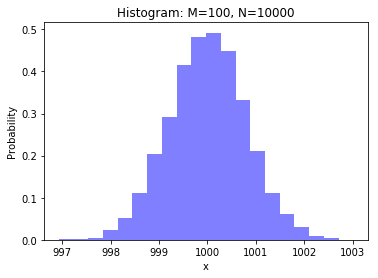

In [6]:
num_bins = 20
n, bins, patches = plt.hist(N_sum, num_bins, normed=1, facecolor='blue', alpha=0.5)
#y = mlab.normpdf(bins, 100, 0.5)
#plt.plot(bins, y, 'r--')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram: M=100, N=10000')
plt.subplots_adjust(left=0.15)
plt.show()

### 3.
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.<p>
2) Повторите расчеты, взяв другие значения n и k.


In [7]:
import itertools
import math

In [8]:
# n - количество испытаний
# k - количество успехов за n испытаний
# sample_size - количество бросков в одном испытании
def Monte_Carlo(n, k, sample_size):
    s = []
    for i in range(n):
        s.append(np.random.randint(0, 2, sample_size))
    s = sum(s)
    x = len(list(filter(lambda x: x == k, s)))
    return x/sample_size

In [9]:
def with_bin_coef(n, k):
    C = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    P = C*0.5**n
    return P

In [10]:
print(Monte_Carlo(5, 2, 10000), with_bin_coef(5, 2))

0.3091 0.3125


In [11]:
print(Monte_Carlo(7, 4, 10000), with_bin_coef(7, 4))

0.2736 0.2734375


### 4. 
Повторите расчеты (размещений и перестановок), взяв другие значения n и k.

In [12]:
n = 5
k = 3

In [13]:
digits_as_str = ''.join(map(str, range(n)))

In [14]:
for p in itertools.permutations(digits_as_str, k):
    print(''.join(str(x) for x in p))

012
013
014
021
023
024
031
032
034
041
042
043
102
103
104
120
123
124
130
132
134
140
142
143
201
203
204
210
213
214
230
231
234
240
241
243
301
302
304
310
312
314
320
321
324
340
341
342
401
402
403
410
412
413
420
421
423
430
431
432


In [15]:
for p in itertools.combinations(digits_as_str,k):
    print(''.join(p))

012
013
014
023
024
034
123
124
134
234


### 5. 
Дополните код расчетом коэффициента корреляции x и y по формуле

0.7034477449540087 0.14844658168690997
0.7034477449540084 0.14844658168691052


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


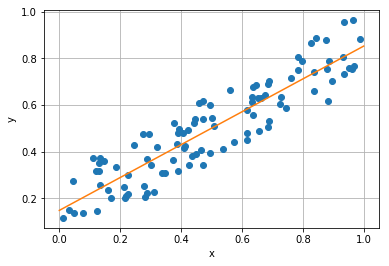

In [16]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [17]:
#for i in range(n):
x_m = sum(x)/n
y_m = sum(y)/n

R = np.matmul((x - x_m),(y - y_m))/np.sqrt(np.matmul((x - x_m),(x - x_m))*np.matmul((y - y_m),(y - y_m)))
print(R)

# Проверка
np.corrcoef(x, y)

0.9108745441037109


array([[1.        , 0.91087454],
       [0.91087454, 1.        ]])